# Прикладная статистика. ДЗ 5.
# Академия Аналитиков Авито


__Правила:__
- Жесткий дедлайн: **2022-04-30 23:59:59**. 
- Ответ и обсуждение решения — в телеграме.

- Выполненную работу нужно отправить
    - в чатик HW5-<ваше имя> через бота @AAA_stats23_bot
- В качестве решения нужно отправить файл ipynb. Ссылка на интернет-ресурсы не принимается. Не публикуйте решения в открытом доступе!
- Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. **При этом можно добавлять новые ячейки!**
- в ячейках с комменарием `#Автопроверка` нужно заполнить содержимое функций и классов (если есть), которые будут уже объявлены в этой ячейке. При этом:
    - Нельзя убрирать или переставять `#Автопроверка` в ячейке. 
    - Нельзя менять сигнатуру и возвращаемое значение функций. То есть добавлять любой код можно, но удалять, что уже написано - нельзя.
    - Нельзя ничего импортировать в таких ячейках. Все доступные для использования библиотеки будут указаны заранее. Такие слова, как `import`, `globals`, `locals`, `eval`, `exec` также нельзя использовать внутри ячеек.
    - Нельзя использовать библиотеки, кроме тех, что указаны в задании. Ваш код должен работать именно с эти набором библиотек без любого дополнительного импорта!
    - Нельзя использовать код из других ячеек ноутбука (кроме ячейки с импортом, в которой указаны все доступные библиотеки). Единственное исключение - если вы проставите в начало такой ячейки слово `#Автопроверка`. Тогда вы можете использовать код из этой ячейки.
    - В случае нарушения этого правила автопроверка будет провалена и вы не получите часть баллов за задачу. 
    - В случае, если есть несколько ячеек автопроверки, то в каждой такой ячейке можно использовать созданные вами функции (или классы) из других ячеек автопроверки.

In [1]:
import numpy as np
import scipy.stats as sps
from matplotlib import pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

%matplotlib inline

In [2]:
sns.set(font_scale=1.2, palette='Set2')

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 24
plt.rcParams["figure.figsize"] = (12, 7)

SEED = 123

## Задача 1 (4 балла)

Интересно, насколько применение поправки Бонферрони увеличивает ширину доверительного интервала?

Допустим, что в нашем эксперименте мы строим двусторонний 95% доверительный интервал для $\mu$ с помощью t-test (размер выборки 1 миллион).

Пусть m - количество гипотез.

Для разных вариантов m продемонстрировать, насколько расширяется доверительный интервал для $\mu$ в этом эксперименте.

Продемонстрируйте зависимость на графиках, а также не забудьте написать вывод.

**Константы для эксперимента**

In [10]:
ALPHA = 0.05
MAX_M = 1000
SAMPLE_SIZE = 1000000
DISTR = sps.expon(scale=1000)

**Проверка достаточности свободной памяти (> 8 * 10^3 * 10^6 байт)**

In [11]:
import psutil


assert(psutil.virtual_memory()[1] > 8*MAX_M*SAMPLE_SIZE, 'Choose lower MAX_M or SAMPLE_SIZE')

<>:4: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:4: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/tmp/ipykernel_5477/3244742608.py:4: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(psutil.virtual_memory()[1] > 8*MAX_M*SAMPLE_SIZE, 'Choose lower MAX_M or SAMPLE_SIZE')


Сэмплируем

In [9]:
big_sample = DISTR.rvs((SAMPLE_SIZE, MAX_M), random_state=SEED).astype(np.float32)
ttest_res = sps.ttest_1samp(big_sample, popmean=DISTR.mean())

Вычисляем средний доверительный интервал для каждого `m`

In [19]:
ci_lbound = ttest_res.confidence_interval(1-ALPHA)[0]
ci_ubound = ttest_res.confidence_interval(1-ALPHA)[1]

ci_avg_lbound = np.cumsum(ci_lbound) / np.arange(1, MAX_M+1)
ci_avg_ubound = np.cumsum(ci_ubound) / np.arange(1, MAX_M+1)

adj_ci_avg_lbound = []
adj_ci_avg_ubound = []

for m in tqdm(range(1, MAX_M+1)):
    adj_ci_avg_lbound.append(ttest_res.confidence_interval(1-ALPHA/m)[0][:m].mean())
    adj_ci_avg_ubound.append(ttest_res.confidence_interval(1-ALPHA/m)[1][:m].mean())

  0%|          | 0/1000 [00:00<?, ?it/s]

Отрисовываем

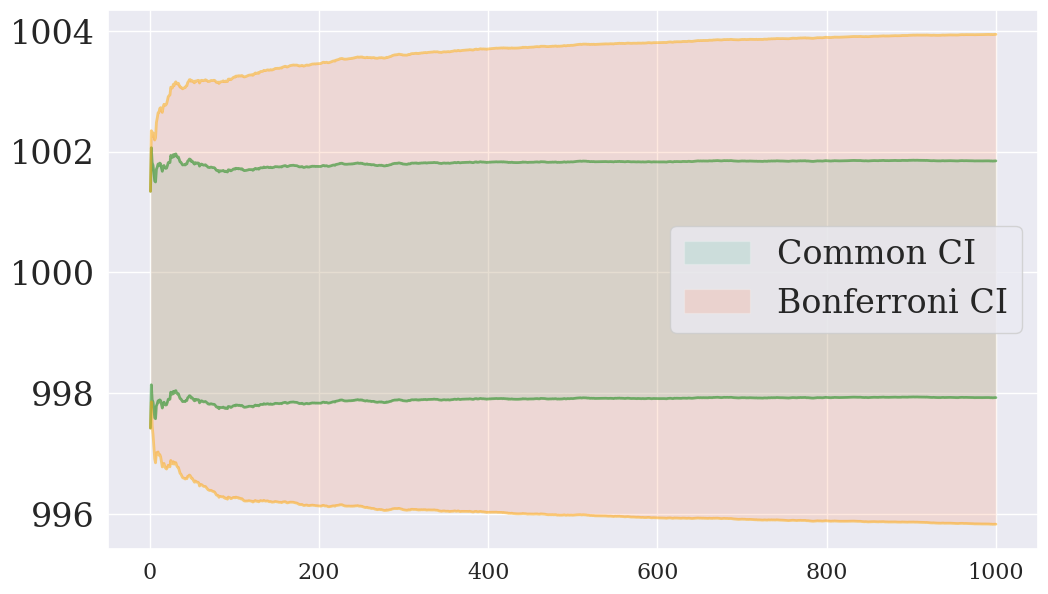

In [28]:
plt.fill_between(range(1, MAX_M+1), ci_avg_lbound, ci_avg_ubound, alpha=0.2, label='Common CI')
plt.fill_between(range(1, MAX_M+1), adj_ci_avg_lbound, adj_ci_avg_ubound, alpha=0.2, label='Bonferroni CI')

plt.plot(range(1, MAX_M+1), ci_avg_lbound, alpha=0.5, color='green')
plt.plot(range(1, MAX_M+1), ci_avg_ubound, alpha=0.5, color='green')

plt.plot(range(1, MAX_M+1), adj_ci_avg_lbound, alpha=0.5, color='orange')
plt.plot(range(1, MAX_M+1), adj_ci_avg_ubound, alpha=0.5, color='orange')

plt.legend()
plt.show()

Расширение дов.интервала в 2 раза (с 4 до 8) для `sample_size = 1000000, alpha = 0.05`  
Связано это с тем, что $\sqrt{\dfrac{S^2}{\text{sample_size}}} \approx 1, \;$
$(1-\frac{\alpha}{2})\text{-квантиль Стьюдента} = 1.96, \; (1-\frac{\alpha}{2 \cdot \text{MAX_M}})\text{-квантиль Стьюдента} = 4.06$  
Итого, ДИ увеличился на $(4.06 - 1.96) \cdot 1 \approx 2$ единицы с каждой стороны, итого на 4 единицы

## Задача 2 (12 баллов)

### Пункт А. 2 балла

В данном домашнем задании вам предлагается придумать относительный t-test критерий для AB-тестов.


Какую гипотезу мы проверяли ранее в t-test?

$H_0: E T - E C = 0$

Мы умееем для такой гипотезы строить критерий и доверительный интервал.

Но в [бизнесе чаще бывает полезна](https://habr.com/ru/companies/avito/articles/571094/) другая формулировка:

$H_0: \dfrac{E T}{E C} - 1= 0$

С точки зрения гипотезы она ничем не отличается от перового случая. Но вот доверительный интервал будет другим! И нам интересно научиться строить корректный доверительный интервал для этой гипотезы.


В данном пункте предлагается построить этот критерий в случае, если выборки тест и контроля одинакового размера.

P.S. Решить задачу нужно именно через линеаризацию




In [15]:
import scipy.stats as sps
import numpy as np
from tqdm.notebook import tqdm
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.api import CompareMeans, DescrStatsW

Распишите текстом ваш алгоритм действий.

Итак, мы хотим оценить мат.ожидание ratio-метрики $Z = \dfrac{T}{C}$  
Предлагается разложить её по формуле Тейлора до первого порядка включительно в точке $(\overline{T}, \overline{C})$

$$ \dfrac{T}{C} \approx \dfrac{\overline{T}}{\overline{C}} + \dfrac{1}{\overline{C}} \cdot (T - \dfrac{\overline{T}}{\overline{C}} C) = c + d \cdot (T - c \cdot C)$$  

$$ \mathbb{E} \bigl( \dfrac{T}{C} \bigr) \approx c + d \cdot \mathbb{E} (T - c \cdot C)$$  

Таким образом, для оценки $\mathbb{E} Z$ достаточно оценить $\mathbb{E} (T - c \cdot C)$, а это уже можно сделать с помощью обычного t-теста.  
В итоге имеем, что получение ДИ для относительного t-теста сводится к ДИ для одновыборочного t-теста

In [111]:
def simple_relative_ttest_CI(test: np.ndarray, control: np.ndarray, alpha: float = 0.05) -> tuple:
    """
    Построение относительного доверительного интервала в случае выборок одинакового размера: ET/EC - 1
    """
    assert len(test) == len(control)
    left_bound = 0
    right_bound = 0
    
    n = len(test)
    coef_c = np.mean(test) / np.mean(control)
    coef_d = 1 / np.mean(control)
    
    modified_sample = test - coef_c * control
    ttest_res = sps.ttest_1samp(modified_sample, 0)
    ci = ttest_res.confidence_interval(1-alpha)
    
    left_bound = coef_c + coef_d * ci[0]
    right_bound = coef_c + coef_d * ci[1]
    
    return left_bound, right_bound

А теперь проверьте ваш критерий на Монте-Карло: лежит ли истинный относительный эффект в доверительном интервале, или нет? Изменять код генерации выборок ниже не надо.

**AB-тест**

In [112]:
np.random.seed(8)

bad_cnt = 0

mc_size = 10000
test_size = 1000
control_size = 1000
effect = 0.6

tp_counter = 0

for _ in tqdm(range(mc_size)):
    test = sps.expon(loc=0, scale=50).rvs(test_size) * (1 + effect)
    control = sps.expon(loc=0, scale=50).rvs(control_size)

    left_bound, right_bound = simple_relative_ttest_CI(test, control, alpha=0.05)
    
    if left_bound < (1 + effect) < right_bound:
        tp_counter += 1

print('TP Proportion =', tp_counter / mc_size)
proportion_confint(tp_counter, mc_size)

  0%|          | 0/10000 [00:00<?, ?it/s]

TP Proportion = 0.9495


(0.9452081823187888, 0.9537918176812112)

ДИ для treatment-а оказывается верен в $\approx 95\%$ случаев, что было ожидаемо

**АА-тест**

In [113]:
np.random.seed(SEED)

mc_size = 10000
test_size = 1000
control_size = 1000

tn_counter = 0

for _ in tqdm(range(mc_size)):
    test = sps.expon(loc=0, scale=50).rvs(test_size)
    control = sps.expon(loc=0, scale=50).rvs(control_size)

    left_bound, right_bound = simple_relative_ttest_CI(test, control, alpha=0.05)
    
    if left_bound < 1 < right_bound:
        tn_counter += 1

print('TN Proportion =', tn_counter / mc_size)
proportion_confint(tn_counter, mc_size)

  0%|          | 0/10000 [00:00<?, ?it/s]

TN Proportion = 0.9493


(0.9450001449940122, 0.9535998550059879)

Единица попадает в ДИ с вер-тью 95% -- всё чикибамбони

### Пункт B. 2 балла

Решите задачу в общем случае: что, если выборки теста и контроля разного размера? Как здесь применить линеаризацию (решать нужно именно через нее), если нельзя однозначно сопоставить элемент в тесте и в контроле?


Если вам нужна будет подсказка, то вы можете найти ее [здесь](https://habr.com/ru/companies/avito/articles/454164/)

Распишите ваш критерий: как он будет работать? На каком трюке он будет основан?

Всё аналогично путнкту A, только теперь всё сводится к получению ДИ для двухвыборочного t-теста (ввиду разных размеров выборок)

In [65]:
def full_relative_ttest_CI(test, control, alpha=0.05):
    """
    Построение относительного доверительного интервала в случае выборок разного ращзмера: ET/EC - 1
    """
    left_bound = 0
    right_bound = 0
    
    n = len(test)
    m = len(control)
    coef_c = np.mean(test) / np.mean(control)
    coef_d = 1 / np.mean(control)
    
    cm = CompareMeans(
        DescrStatsW(test),
        DescrStatsW(coef_c * control)
    )
    ci = cm.tconfint_diff(alpha, usevar='unequal')
    
    left_bound = coef_c + coef_d * ci[0]
    right_bound = coef_c + coef_d * ci[1]
    
    return left_bound, right_bound

**AB-тест**

In [68]:
np.random.seed(8)

bad_cnt = 0

mc_size = 10000
test_size = 20000
control_size = 1000
effect = 0.6

tp_counter = 0

for i in tqdm(range(mc_size)):
    test = sps.expon(loc=0, scale=50).rvs(test_size) * (1 + effect)
    control = sps.expon(loc=0, scale=50).rvs(control_size)

    left_bound, right_bound = full_relative_ttest_CI(test, control, alpha=0.05)
    
    if left_bound < (1 + effect) < right_bound:
        tp_counter += 1

print('TP Proportion =', tp_counter / mc_size)
proportion_confint(tp_counter, mc_size)

  0%|          | 0/10000 [00:00<?, ?it/s]

TP Proportion = 0.9494


(0.9451041613296008, 0.9536958386703992)

**AA-тест**

In [70]:
np.random.seed(SEED)

mc_size = 10000
test_size = 20000
control_size = 1000

tn_counter = 0

for _ in tqdm(range(mc_size)):
    test = sps.expon(loc=0, scale=50).rvs(test_size)
    control = sps.expon(loc=0, scale=50).rvs(control_size)

    left_bound, right_bound = full_relative_ttest_CI(test, control, alpha=0.05)
    
    if left_bound < 1 < right_bound:
        tn_counter += 1

print('TN Proportion =', tn_counter / mc_size)
proportion_confint(tn_counter, mc_size)

  0%|          | 0/10000 [00:00<?, ?it/s]

TN Proportion = 0.9474


(0.943024701846025, 0.951775298153975)

Критерий реализован корректно

### Пункт C. 3 балла

Также проверьте, насколько полученный доверительный интервал у данного критерия шире, чем у критерия, основанного на бутстрапе?

Ответ надо пояснить на Монте-Карло и теоретически.

In [87]:
def relative_bootstrap_CI(test, control, alpha=0.05, bs_samples=5000):
    n = len(test)
    m = len(control)
    stats = []
    
    for _ in range(bs_samples):
        bs_test = test[np.random.randint(0, n, n)]
        bs_control = control[np.random.randint(0, m, m)]
        
        stats.append(np.mean(bs_test) / np.mean(bs_control))
        
    lower_bound = np.quantile(stats, alpha/2)
    upper_bound = np.quantile(stats, 1-alpha/2)
    
    return lower_bound, upper_bound

**Сравнение длины ДИ с помощью Монте-Карло**

In [94]:
np.random.seed(SEED)

mc_size = 5000
test_size = 2000
control_size = 1000
effect = 0.6
alpha = 0.05

ttest_tp_counter = 0
bootstrap_tp_counter = 0

ttest_ci_len = []
bootstrap_ci_len = []

for _ in tqdm(range(mc_size)):
    test = sps.expon(loc=0, scale=50).rvs(test_size) * (1 + effect)
    control = sps.expon(loc=0, scale=50).rvs(control_size)

    ttest_lbound, ttest_ubound = full_relative_ttest_CI(test, control, alpha)
    bootstrap_lbound, bootstrap_ubound = relative_bootstrap_CI(test, control, alpha)
    
    if ttest_lbound < 1 + effect < ttest_ubound:
        ttest_tp_counter += 1
        
    if bootstrap_lbound < 1 + effect < bootstrap_ubound:
        bootstrap_tp_counter += 1
        
    ttest_ci_len.append(ttest_ubound - ttest_lbound)
    bootstrap_ci_len.append(bootstrap_ubound - bootstrap_lbound)

print('Ttest TP Proportion =', ttest_tp_counter / mc_size)
print('Ttest TP CI =', proportion_confint(ttest_tp_counter, mc_size))
print('='*80)
print('Bootstrap TP Proportion =', bootstrap_tp_counter / mc_size)
print('Bootstrap TP CI =', proportion_confint(bootstrap_tp_counter, mc_size))

  0%|          | 0/5000 [00:00<?, ?it/s]

Ttest TP Proportion = 0.9484
Ttest TP CI = (0.9422682602705237, 0.9545317397294764)
Bootstrap TP Proportion = 0.949
Bootstrap TP CI = (0.9429020861688151, 0.9550979138311848)


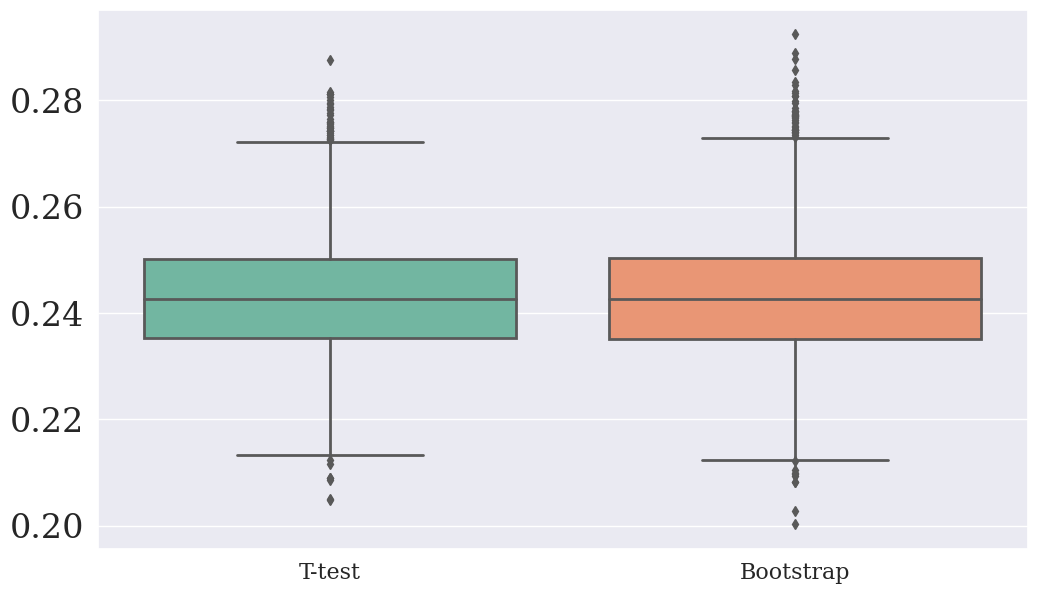

In [96]:
sns.boxplot(data=[ttest_ci_len, bootstrap_ci_len])
plt.xticks(range(2), ['T-test', 'Bootstrap'])
plt.show()

**Вывод:**  
Монте-Карло говорит нам о том, что у t-тест и у бутстрапа одинаковые длины доверительных интервалов.  
Хрен его знает, как это объяснить теоретически.  
В t-тесте используется линейная аппроксимация методом Тейлора, отчего возникает погрешность при построении ДИ.  
В свою очередь бутстрап основывается на эвристике Монте-Карло и "близости" эмпирического и теоретического распределений, отчего также ДИ может быть неточен. Непонятно, как можно сравнить эти погрешности

### Пункт D. 3 балла

Но и это еще не все: мы рассмотрим с вами, как построить более мощный критерий, основываясь на данных с пред периода.

Поговорим о критерии [постнормировки](https://habr.com/ru/companies/avito/articles/571096/).

В данном случае у нас есть 4 выборки:

- `test_before, control_before` &mdash; значения вашей метрики от пользователя на пред. эсперементальном периоде. Выборки в тесте и в контроле будут однородны.
- `test, control` &mdash; значения метрики от пользователя после начала AB-теста. Выборки теперь уже из разных распределений!


Нужно построить критерий для 

$$
    H_0: \dfrac{ET}{ET_b} / \dfrac{EC}{EC_b} - 1 = 0,
$$

а точнее доверительный интервал для этой гипотезы

Сначала опишите ваш алгоритм

**Идея простая: используем двойную линеаризацию!**  
Отдельно линеаризуем числитель и знаменатель (строки 15 и 16), а затем применяем ранее реализованный метод построения ДИ к уже отнормированным тестовым и конрольным выборкам

In [153]:
def fraction_taylor_decomp(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    Разложение в ряд Тейлора в окр-ти точки x.mean() / y.mean() функции f(x, y) = x / y
    """
    c = x.mean() / y.mean()
    d = 1 / y.mean()
    
    return c + d * (x - c * y)


def post_normed_ttest(control, test, control_before, test_before, alpha=0.05):
    """
    Построение критерия пост-нормировки.
    """
    normalized_test = fraction_taylor_decomp(test, test_before)
    normalized_control = fraction_taylor_decomp(control, control_before)
    
    return full_relative_ttest_CI(normalized_test, normalized_control, alpha)

Теперь давайте проверим ваш критерий:

**AB-тест**

In [103]:
np.random.seed(8)

mc_size = 10000
test_size = 20000
control_size = 1000
effect = 0.3
tp_counter = 0

for _ in tqdm(range(mc_size)):
    test_before = sps.expon(loc=0, scale=50).rvs(test_size)
    control_before = sps.expon(loc=0, scale=50).rvs(control_size)

    test = (test_before + sps.norm(loc=0, scale=10).rvs(test_size)) * (1 + effect)
    control = (control_before + sps.norm(loc=0, scale=20).rvs(control_size))

    left_bound, right_bound = post_normed_ttest(control, test, control_before, test_before, alpha=0.05)

    if left_bound < (1 + effect) < right_bound:
        tp_counter += 1

print('TP Proportion =', tp_counter / mc_size)
proportion_confint(tp_counter, mc_size)

  0%|          | 0/10000 [00:00<?, ?it/s]

TP Proportion = 0.948


(0.9436483502665662, 0.9523516497334337)

**AA-тест**

In [110]:
np.random.seed(SEED)

mc_size = 10000
test_size = 20000
control_size = 1000
tn_counter = 0

for _ in tqdm(range(mc_size)):
    test_before = sps.expon(loc=0, scale=50).rvs(test_size)
    control_before = sps.expon(loc=0, scale=50).rvs(control_size)

    test = (test_before + sps.norm(loc=0, scale=10).rvs(test_size))
    control = (control_before + sps.norm(loc=0, scale=20).rvs(control_size))

    left_bound, right_bound = post_normed_ttest(control, test, control_before, test_before, alpha=0.05)

    if left_bound < 1 < right_bound:
        tn_counter += 1

print('TN Proportion =', tn_counter / mc_size)
proportion_confint(tn_counter, mc_size)

  0%|          | 0/10000 [00:00<?, ?it/s]

TN Proportion = 0.9502


(0.9459364606517954, 0.9544635393482047)

Всё супер! Метод построения ДИ корректен!

### Пункт E. 2 балла

Как вы думаете, зачем нужна постнормировка на практике? Ответ поясните на практическом примере.

**Ответ:**  
1. В случае, если разбивка на test/control была проведена неправильно (то есть группы неоднородны), то постнормировка исправляет этот недочёт, внедряя информацию о предпериоде в стат.критерий
2. (Возможно) Уменьшение длины доверительного интервала

Для начала проверим первый тезис.

На предпериоде среднее теста больше в 1.3 раза, чем среднее контроля. При этом считаем, что некоторое изменение в тестовой выборке никак не повлияло на нашу целевую метрику (просто добавили нормальный шум и всё).
Посмотрим, как поведут себя доверительные интервалы

In [138]:
np.random.seed(SEED)

mc_size = 10000
test_size = 2000
control_size = 1000
scale_effect = 0.3

norm_tn_counter = 0
tn_counter = 0

norm_ci = []
common_ci = []

for _ in tqdm(range(mc_size)):
    test_before = sps.expon(loc=0, scale=100*(1+scale_effect)).rvs(test_size)
    control_before = sps.expon(loc=0, scale=100).rvs(control_size)

    test = (test_before + sps.norm(loc=0, scale=15).rvs(test_size))
    control = (control_before + sps.norm(loc=0, scale=15).rvs(control_size))

    norm_lbound, norm_ubound = post_normed_ttest(control, test, control_before, test_before, alpha=0.05)
    lbound, ubound = full_relative_ttest_CI(test, control, alpha=0.05)

    if norm_lbound < 1 < norm_ubound:
        norm_tn_counter += 1

    if lbound < 1 < ubound:
        tn_counter += 1
        
    norm_ci.append((norm_lbound, norm_ubound))
    common_ci.append((lbound, ubound))

print('PostNormalized TN Proportion =', norm_tn_counter / mc_size)
print('PostNormalized Ttest TN CI =', proportion_confint(norm_tn_counter, mc_size))
print('='*80)
print('Common TN Proportion =', tn_counter / mc_size)
print('Common Ttest TN CI =', proportion_confint(tn_counter, mc_size))

  0%|          | 0/10000 [00:00<?, ?it/s]

PostNormalized TN Proportion = 0.9454
PostNormalized Ttest TN CI = (0.9409470049603441, 0.9498529950396559)
Common TN Proportion = 0.0
Common Ttest TN CI = (0.0, 0.0)


In [144]:
norm_ci = np.array(norm_ci)
common_ci = np.array(common_ci)

print('Averaged post-normalized CI =', norm_ci.mean(axis=0))
print('Averaged commmon CI =', common_ci.mean(axis=0))

Averaged post-normalized CI = [0.98941324 1.01061991]
Averaged commmon CI = [1.20124572 1.40056645]


Как мы видим, постнормировка позволила учесть неоднородность теста и контроля

Теперь посмотрим на длины доверительных интервалов

In [154]:
np.random.seed(SEED)

mc_size = 10000
test_size = 2000
control_size = 1000
effect = 0.2
alpha = 0.01

norm_tn_counter = 0
tn_counter = 0

norm_ci_len = []
common_ci_len = []

for _ in tqdm(range(mc_size)):
    test_before = sps.expon(loc=0, scale=100).rvs(test_size)
    control_before = sps.expon(loc=0, scale=100).rvs(control_size)

    test = (test_before + sps.norm(loc=0, scale=10).rvs(test_size)) * (1 + effect)
    control = (control_before + sps.norm(loc=0, scale=20).rvs(control_size))

    norm_lbound, norm_ubound = post_normed_ttest(control, test, control_before, test_before, alpha=alpha)
    lbound, ubound = full_relative_ttest_CI(test, control, alpha=alpha)

    if norm_lbound < 1 + effect < norm_ubound:
        norm_tn_counter += 1

    if lbound < 1 + effect < ubound:
        tn_counter += 1
        
    norm_ci_len.append(norm_ubound - norm_lbound)
    common_ci_len.append(ubound - lbound)

print('PostNormalized TN Proportion =', norm_tn_counter / mc_size)
print('PostNormalized Ttest TN CI =', proportion_confint(norm_tn_counter, mc_size))
print('='*80)
print('Common TN Proportion =', tn_counter / mc_size)
print('Common Ttest TN CI =', proportion_confint(tn_counter, mc_size))

  0%|          | 0/10000 [00:00<?, ?it/s]

PostNormalized TN Proportion = 0.9883
PostNormalized Ttest TN CI = (0.9861924134441462, 0.9904075865558537)
Common TN Proportion = 0.9901
Common Ttest TN CI = (0.9881595376595806, 0.9920404623404193)


5.847902273122643


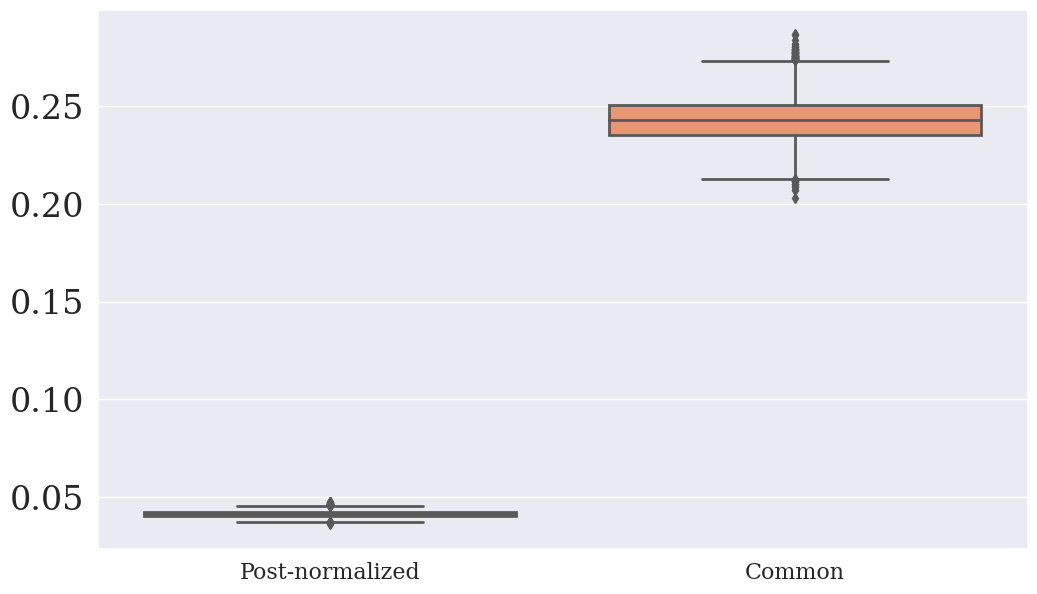

In [155]:
print(np.mean(common_ci_len) / np.mean(norm_ci_len))
sns.boxplot(data=[norm_ci_len, common_ci_len])
plt.xticks(range(2), ['Post-normalized', 'Common'])
plt.show()

Удивительно, но длина ДИ с постнормировкой уменьшилась почти **в 6 раз**!